In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os

import analysis

In [2]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
job_num = 6935
base = './output/' + cfgbase + '_' + str(job_num)
save_graphs = False

C = analysis.read_h5(base, mom = True)    # C should be a dictionary whose keys are the momentum slices.

<IPython.core.display.Javascript object>


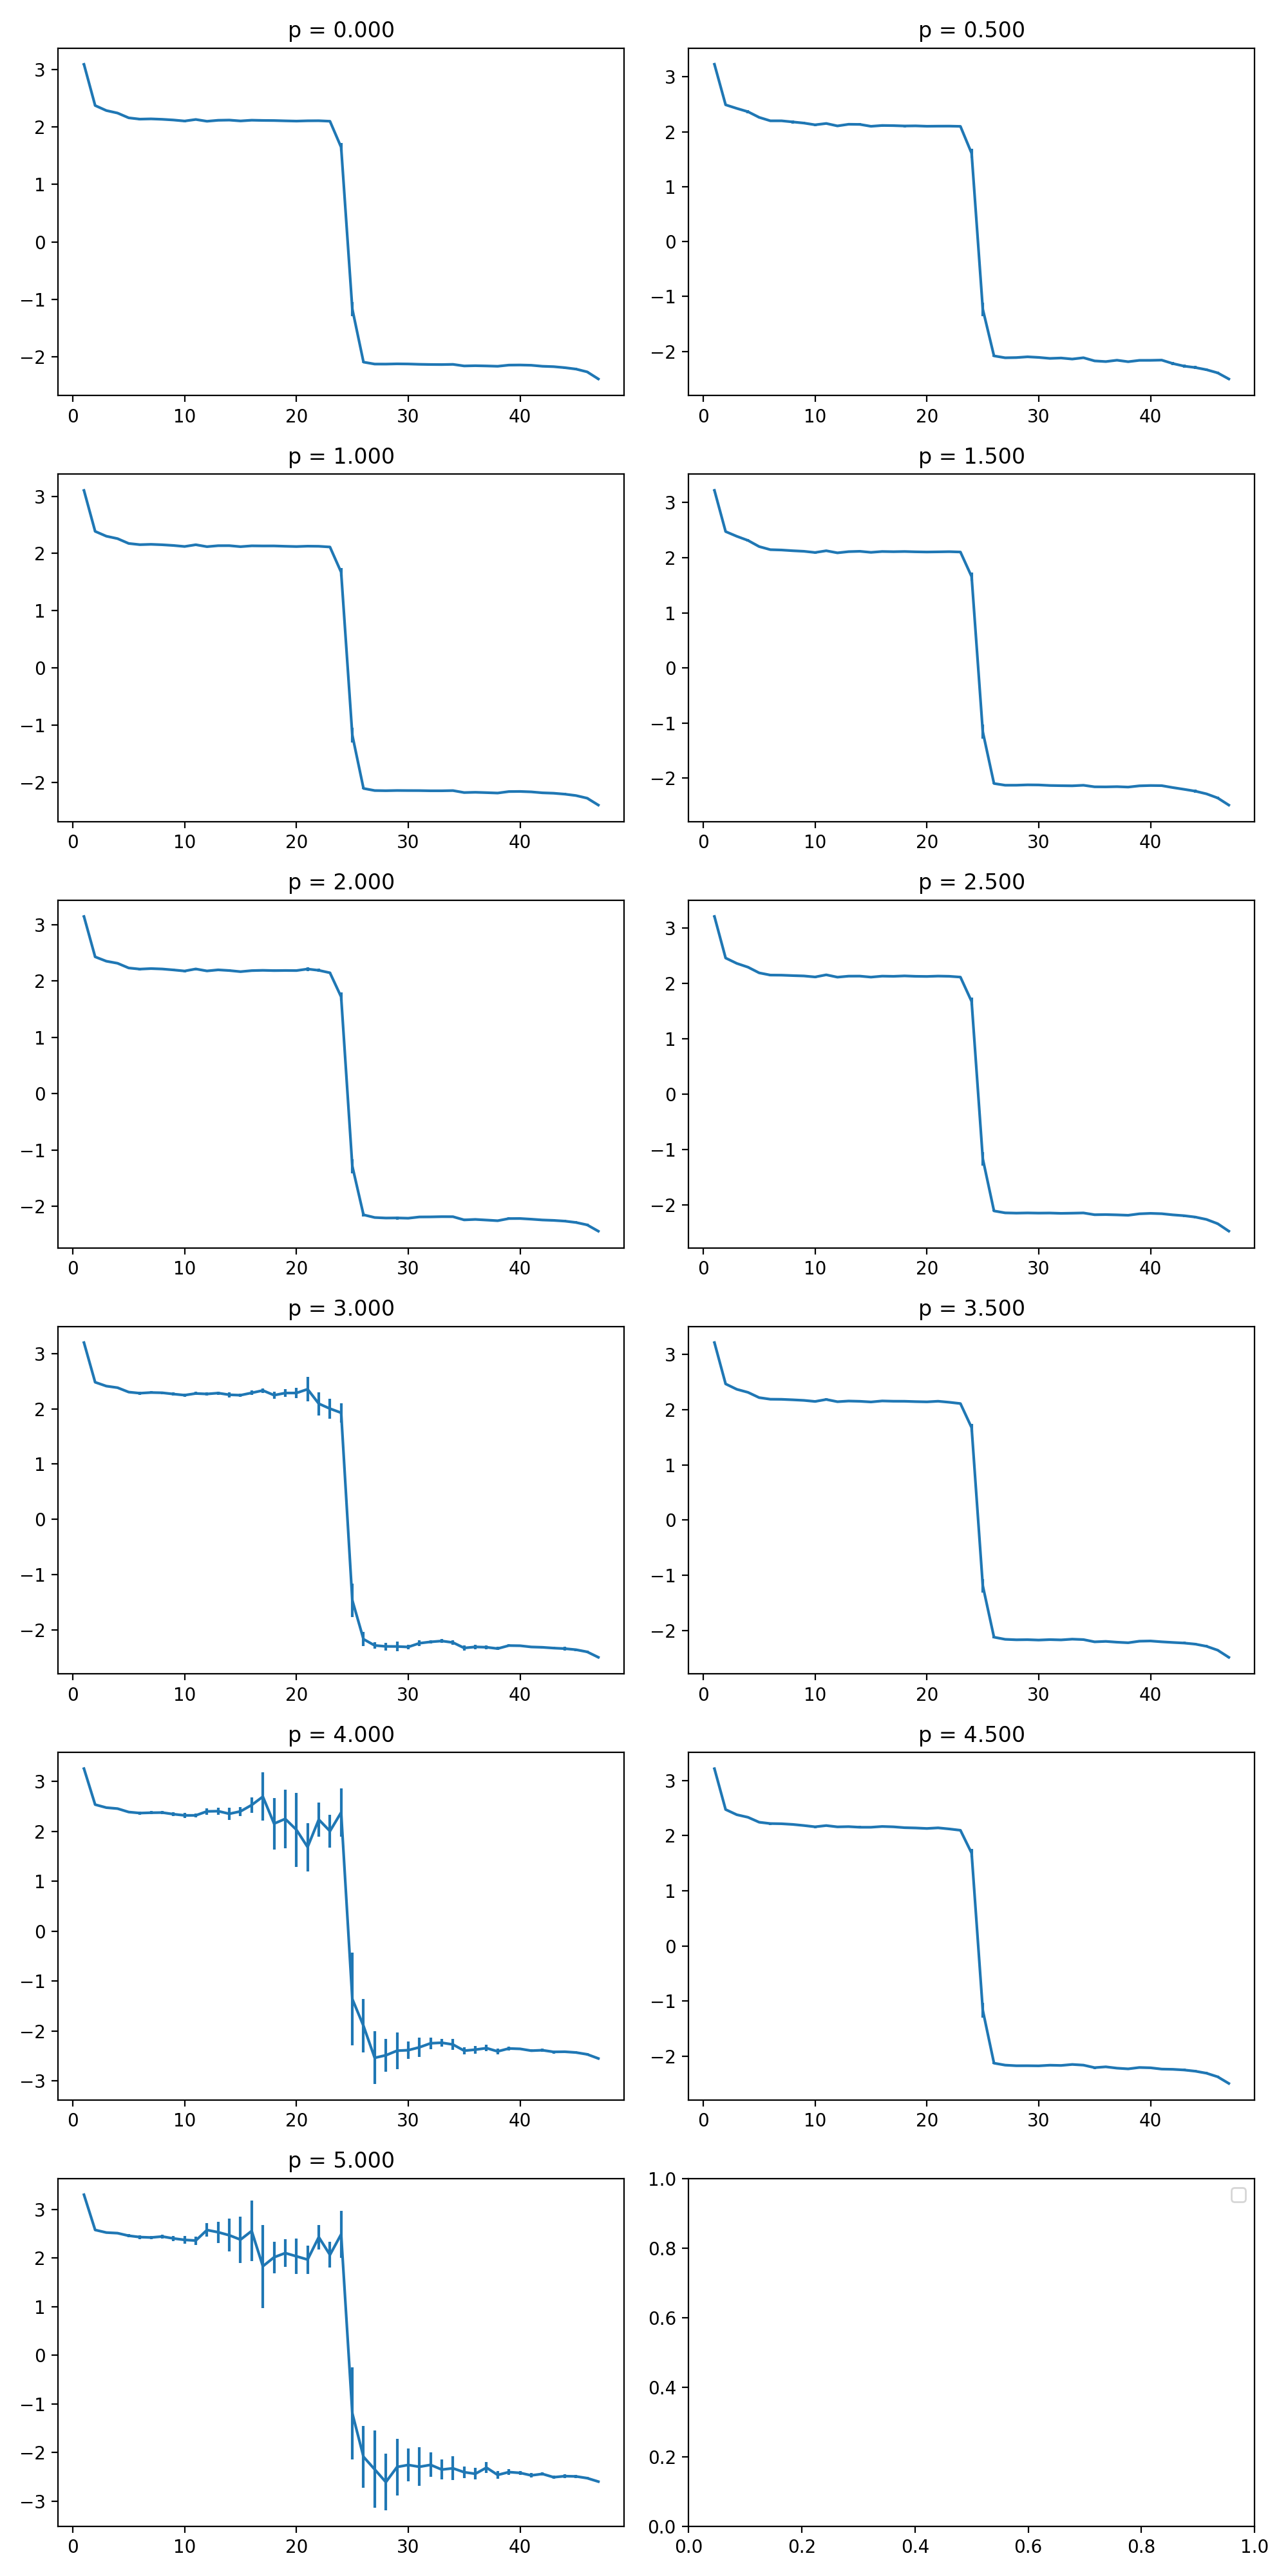

Computing for momentum = 0.000
Computing for momentum = 0.500
Computing for momentum = 1.000
Computing for momentum = 1.500
Computing for momentum = 2.000
Computing for momentum = 2.500
Computing for momentum = 3.000
Computing for momentum = 3.500
Computing for momentum = 4.000
Computing for momentum = 4.500
Computing for momentum = 5.000


No handles with labels found to put in legend.


In [3]:
f, ax = plt.subplots(6, 2, figsize = (10, 20))
ax = ax.flatten()
idx = 0
p_lat = []
m_eff = []
for p, correlators in C.items():
    print('Computing for momentum = ' + str(p))
    num_configs = correlators.shape[0]
    n_t = correlators.shape[1]
    samples = analysis.bootstrap(correlators)
    ensemble_avg = np.mean(samples, axis = 1)
    μ_m_eff, σ_m_eff = analysis.get_effective_mass(ensemble_avg)
    μ_cosh, σ_cosh = analysis.get_cosh_effective_mass(ensemble_avg)
    
    fit_region = range(8, 40)
    flipped = analysis.flip_half_data(μ_m_eff, n_t)
    m_eff.append(analysis.extract_mass(fit_region, flipped))
    p_lat.append(p)
    
    #Plot each curve
    ax[idx].errorbar(range(1, n_t), μ_m_eff, yerr = σ_m_eff)
    #ax[idx].plot(range(1, n_t), μ_m_eff, 'r')
    #ax[idx].plot(range(1, n_t), μ_cosh, 'b')
    ax[idx].set_title('p = ' + str(p))
    idx = idx + 1
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


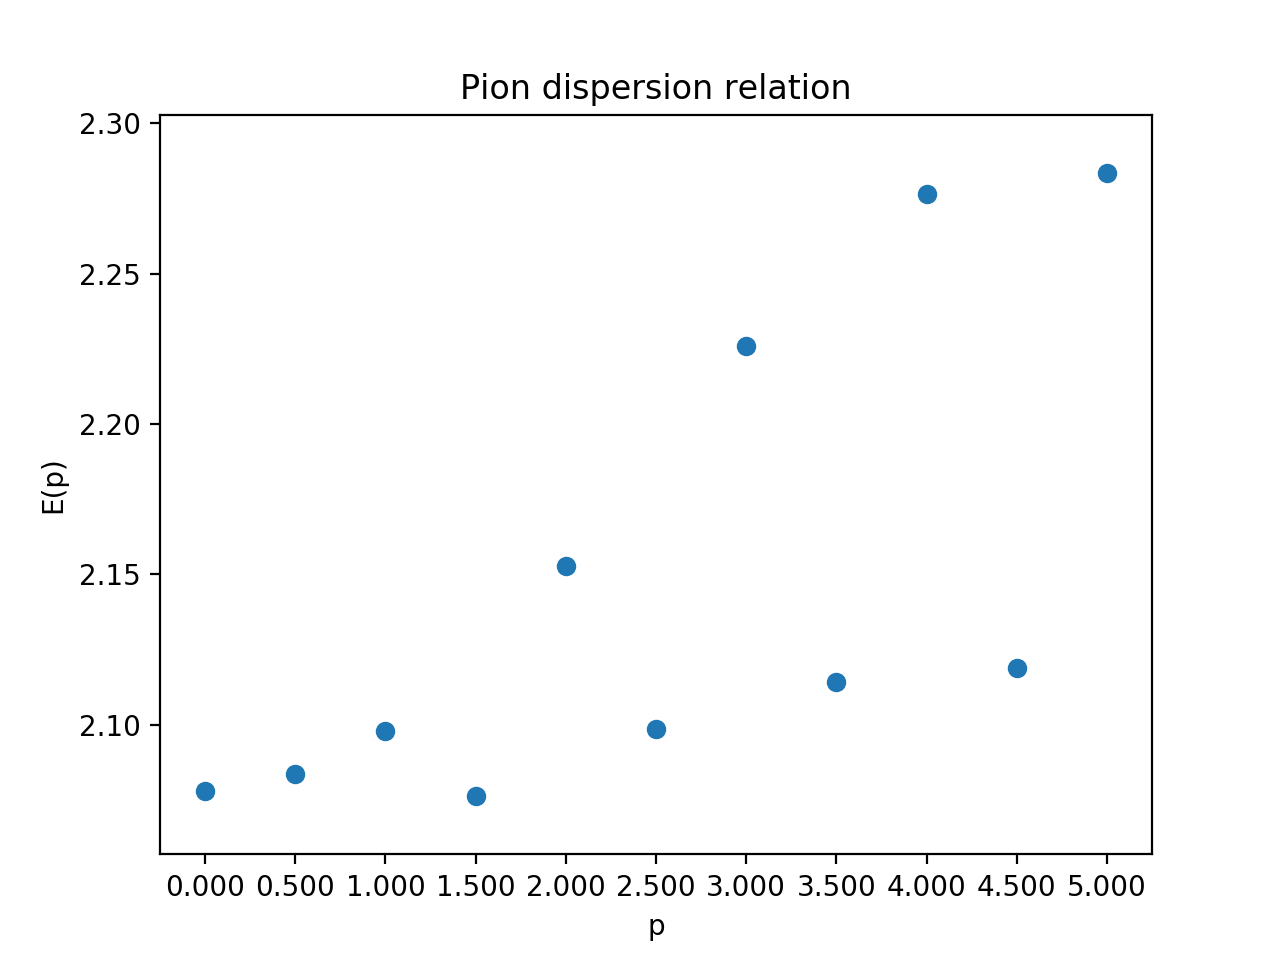

In [4]:
plt.figure()
plt.scatter(p_lat, m_eff)
plt.title('Pion dispersion relation')
plt.ylabel('E(p)')
plt.xlabel('p')
plt.show()